# Banknote Authentication

This project classifies banknotes in classes of genuine and fake notes. 

A model is trained to detect fake notes from genuine notes then distinguish them from genuine notes.

The dataset used here is the banknote Authentication dataset from kaggle. This dataset contains features extracted from wavelet transformed images of both fake and genuine notes.

These features are
    
    . Variance of the wavelet transformed image
    
    . Skewness of the wavelet transformed image
    
    . kurtosis of the wavelet transformed image
    
    . entropy of the wavelet transformed image and 
    
    . classes based on the above features

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\ojare\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the dataset using pandas
dataset = pd.read_csv("BankNoteAuthentication.csv")
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# preparing and exploring data
print("Rows: ", dataset.shape[0])
print("Columns: ", dataset.shape[1], "\n")
print("subset of the dataset: \n", dataset.head(), "\n")

Rows:  1372
Columns:  5 

subset of the dataset: 
    variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



## Labelling Columns in the Dataset
The "Target" column contains the TWO classes of banknotes, that is,  genuine notes and fake notes.

Genuine notes are of class "0" while fake notes are of class "1"

In [4]:
# label data
column_labels = ["Variance", "Skewness", "Kurtosis", "Entropy", "Target"]
dataset.columns = column_labels
print("Colums Names: ", dataset.columns)

Colums Names:  Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object')


In [5]:
dataset.describe()

,Variance,Skewness,Kurtosis,Entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Kurtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Saving Figures as png Images

The code below creates a function that saves plotted figures as png images when called.

In [7]:
# extra code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Check for duplicated values

In [8]:
print(dataset.duplicated().any())
duplicated_data = dataset.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

True
Number of duplicated data:  24


## Correlation

Correlation
Target      1.000000
Kurtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Target, dtype: float64


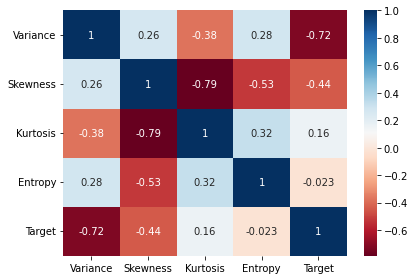

In [9]:
# Check for correlation
print("Correlation")
print(dataset.corr()["Target"].sort_values(ascending=False))
sns.heatmap(dataset.corr(), annot=True, cmap="RdBu")
save_fig("correlation")
plt.show()

In [10]:
print("Number of Authenticated: ", dataset["Target"][dataset["Target"] == 0].count())
print("Number of Unauthenticated: ", dataset["Target"][dataset["Target"] == 1].count())

Number of Authenticated:  762
Number of Unauthenticated:  610


## Data Visualization

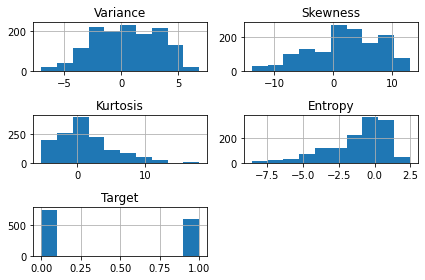

In [11]:
# plot a histogram to visualize the dataset
dataset.hist()
save_fig("banknote_data_visualization")
plt.show()

From the above histograms, Kurtosis is negative skewness while Entropy is positive skewness

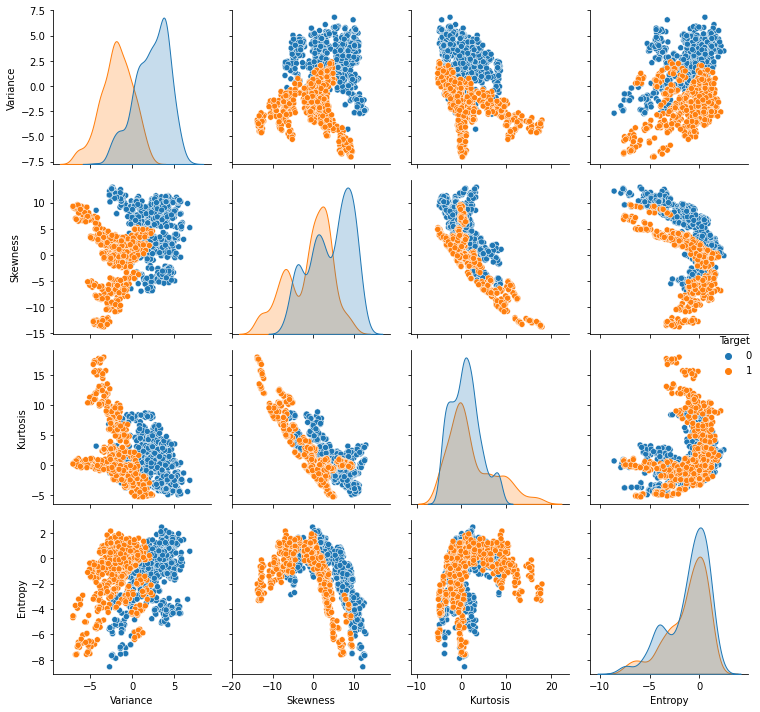

In [12]:
sns.pairplot(data=dataset, hue='Target')
save_fig("pairplot")
plt.show()

## Splitting Dataset

In [13]:
X = dataset.drop("Target", axis=1).values
y = dataset["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1097, 4)
(1097,)


## Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

The Accuracy of Logistic Regression Algorithm:  98.54545454545455


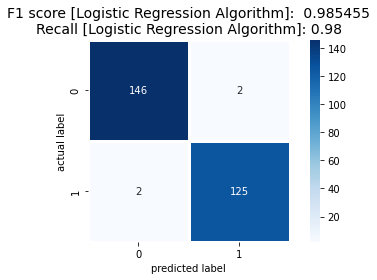

In [17]:
regressor = LogisticRegression()

# fitting dataset
model = regressor.fit(X_train, y_train)

# prediction data
y_pred = regressor.predict(X_test)

# Logistic regression results
print("Classification report:")
print(metrics.classification_report(y_test, y_pred))

# accuracy score matrix
print("The Accuracy of Logistic Regression Algorithm: ", metrics.accuracy_score(y_test, y_pred)*100)

# F1 score
f1_score_log = metrics.f1_score(y_test, y_pred, average="micro")

# confusion matrix
cm_log = metrics.confusion_matrix(y_test, y_pred)

# recall
recall_log = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

# show F1 score and recall
plt.title(f"F1 score [Logistic Regression Algorithm]: {f1_score_log: 2f}\n"
         
         f"Recall [Logistic Regression Algorithm]: {recall_log:.2f}", size=14, color="black")
save_fig("log_F1_score_and_recall")
plt.show()

## KNN Algorithm

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy of KNN Algorithm:  100.0


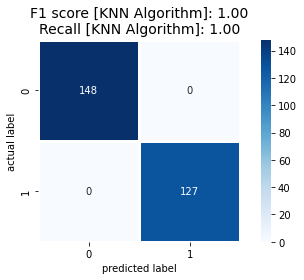

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit training data
knn.fit(X_train, y_train)

# predicted data
y_pred = knn.predict(X_test)

# KNN Results
#Classification report

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

# Accuracy score matrix
print("Accuracy of KNN Algorithm: ",
     metrics.accuracy_score(y_test, y_pred)*100)

# F1 score
f1_score_knn = metrics.f1_score(y_test, y_pred, average="micro")

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred)

# recall
recall_knn = metrics.recall_score(y_test, y_pred)

#Heatmap confusion matrix
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

# show F1 score and recall
plt.title(f"F1 score [KNN Algorithm]: {f1_score_knn:.2f}\n"
         f"Recall [KNN Algorithm]: {recall_knn:.2f}", size=14, color="black")
save_fig("knn_f1_score_and_recall")
plt.show()

## Naive Bayes

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       148
           1       0.86      0.70      0.77       127

    accuracy                           0.81       275
   macro avg       0.82      0.80      0.80       275
weighted avg       0.81      0.81      0.80       275

Accuracy of Naive Bayes Algorithm:  80.72727272727272


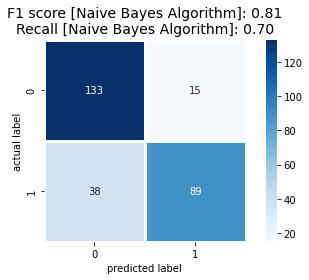

In [21]:
gnb = GaussianNB()

# fitting training data
model = gnb.fit(X_train, y_train)

# predicted data
y_pred = gnb.predict(X_test)

# Naive Bayes Results
print("Classification Report: ")
print(metrics.classification_report(y_test, y_pred))

print("Accuracy of Naive Bayes Algorithm: ", 
      metrics.accuracy_score(y_test, y_pred)*100)

# F1 score
f1_score_nb = metrics.f1_score(y_test, y_pred, average="micro")

# confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_pred)

# Recall
recall_nb = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix
sns.heatmap(cm_nb, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Blues", color="#cd1076")
plt.ylabel("actual label")
plt.xlabel("predicted label")

# Show F1 score and recall

plt.title(f"F1 score [Naive Bayes Algorithm]: {f1_score_nb:.2f}\n"
         f"Recall [Naive Bayes Algorithm]: {recall_nb:.2f}", size=14, color="black")
save_fig("NaiveBayes_f1_score_and_recall")
plt.show()

## Support Vector Machines Algorithm

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy of SVM Algorithm:  100.0


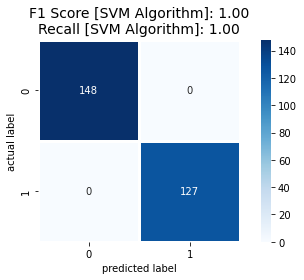

In [23]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM with c=100.0
svm = SVC(kernel='rbf', C=100.0)

# Fitting data
svm.fit(X_train, y_train)

# predicted data
y_pred = svm.predict(X_test)

# SVM Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_pred))

# Accuracy score matrix
print('Accuracy of SVM Algorithm: '
      , metrics.accuracy_score(y_test, y_pred)*100)

# F1 Score
f1_score_SVM = metrics.f1_score(y_test, y_pred, average='micro')

# confusion matrix
cm_SVM = metrics.confusion_matrix(y_test, y_pred)

# recall 
recall_SVM = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix 
sns.heatmap(cm_SVM, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [SVM Algorithm]: {f1_score_SVM:.2f}\n'
          f'Recall [SVM Algorithm]: {recall_SVM:.2f}', size=14, color='black')
save_fig("SVM_f1_score_and_recall")
plt.show()
print('\n')

## Comparing Between the Algorithms using F1 score and Recall

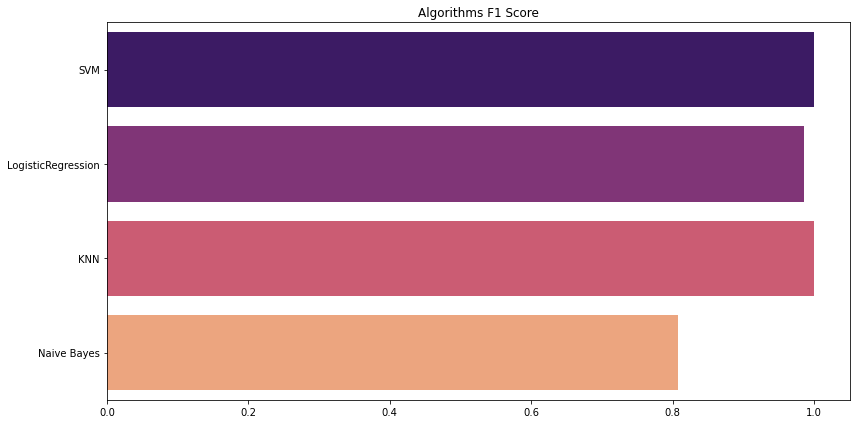

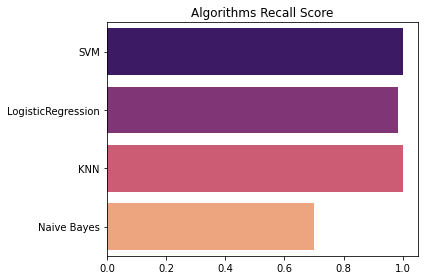

In [25]:
plt.figure(figsize=(12,6))
model_f1_score = [f1_score_SVM, f1_score_log, f1_score_knn, f1_score_nb]
recalls = [recall_SVM, recall_log, recall_knn, recall_nb]
model_name = ["SVM", "LogisticRegression", "KNN", "Naive Bayes"]
recall_names = ["SVM", "LogisticRegression", "KNN", "Naive Bayes"]

# Bar plot F1 score
sns.barplot(x=model_f1_score, y=model_name, palette="magma")
plt.title("Algorithms F1 Score")
save_fig("algorithms_f1_score")
plt.show()

# Bar plot Recall
sns.barplot(x=recalls, y=recall_names, palette="magma")
plt.title("Algorithms Recall Score")
save_fig("algorithms_recall_score")
plt.show()

### The best Algorithms for this project are Support Vector Machines and K-Nearest Neighbors